## Exploring online daters and non online daters experiences with harassment  

In [1]:
#!pip install pyreadstat
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-colorblind')

In [2]:
# File path and file name to use
file_path = './data/'
file_name = 'cleaned_PEW_W56.csv'
df = pd.read_csv(file_path + file_name)
df.head(3)

/Users/adrianachacon/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MARITAL_W56,MARITAL2_W56,RELATEVER_W56,CASUAL_W56,SEEKING_W56,MOTIVNODATE.a_W56,MOTIVNODATE.b_W56,MOTIVNODATE.c_W56,MOTIVNODATE.d_W56,MOTIVNODATE.e_W56,...,F_CREGION,F_USR_SELFID,F_AGECAT,F_SEX,F_EDUCCAT,F_EDUCCAT2,F_RACETHN,F_NATIVITY,F_MARITAL,F_INCOME
0,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,South,Urban,65+,Male,College graduate+,Postgraduate,White non-Hispanic,U.S.,Married,"$150,000 or more"
1,Never been married,"No, not in a committed romantic relationship","No, have never been in a committed romantic re...","No, not casually dating anyone",Not currently looking for a relationship or dates,Major reason,Major reason,Not a reason,Not a reason,Not a reason,...,South,Suburban,30-49,Male,College graduate+,College graduate/some post grad,White non-Hispanic,U.S.,Never been married,"Less than $10,000"
2,Never been married,"Yes, in a committed romantic relationship",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Midwest,Suburban,18-29,Female,Some College,"Some college, no degree",White non-Hispanic,U.S.,Living with a partner,"Less than $10,000"


### EDA - Questions related to Harassment

In regards to the question: "Do you think the increased focus on sexual harassment and assault over the last few years has made it easier or harder for MEN and WOMEN to know how to interact with someone they’re on a date with?"

In [3]:
df['DATEHARASSM_W56'].value_counts(normalize=True)

Has made it harder for men     0.617284
Hasn’t made much difference    0.252263
Has made it easier for men     0.115844
Refused                        0.014609
Name: DATEHARASSM_W56, dtype: float64

In [4]:
df['DATEHARASSW_W56'].value_counts(normalize=True)

Has made it harder for women    0.393004
Hasn’t made much difference     0.391152
Has made it easier for women    0.200412
Refused                         0.015432
Name: DATEHARASSW_W56, dtype: float64

In general, women and men across all communities think it has made it harder for men to interact with someone

Comparing online daters and non online daters experience on harassment:

In [5]:
# Replace 'Refused' with null so it doesn't appear in the graph
df['ONLINEDATE_W56'].replace('Refused',np.NaN, inplace= True)

In [6]:
# Assign variable names to these questions and answers to combine these columns and help with the plot below
HARASSEXP1a_W56 = 'Pressured you for sex'
HARASSEXP1b_W56 = 'Touched you in a way that made you feel uncomfortable'
HARASSEXP1c_W56 = 'Sent you sexually explicit images that you didn’t ask for'
HARASSEXP2a_W56 = 'Spread rumors about your sexual history'
HARASSEXP2b_W56 = 'Shared a sexually explicit image of you without your consent' 
HARASSEXP2c_W56 = 'Publicly shared your contact information or address without your permission'
answer_no = 'No, this has not happened to me'
answer_yes = 'Yes, this has happened to me'
answer_refuse = 'Refused'

In [7]:
df[HARASSEXP1a_W56] = df['HARASSEXP1.a_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df[HARASSEXP1b_W56] = df['HARASSEXP1.b_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df[HARASSEXP1c_W56] = df['HARASSEXP1.c_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df[HARASSEXP2a_W56] = df['HARASSEXP2.a_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df[HARASSEXP2b_W56] = df['HARASSEXP2.b_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df[HARASSEXP2c_W56] = df['HARASSEXP2.c_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })

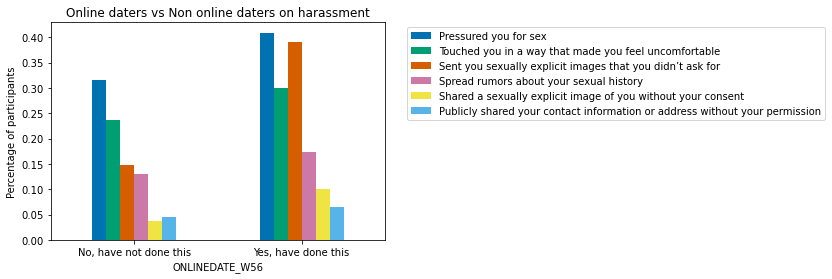

In [8]:
on_haras_exp = [HARASSEXP1a_W56, HARASSEXP1b_W56, HARASSEXP1c_W56, HARASSEXP2a_W56, HARASSEXP2b_W56, HARASSEXP2c_W56]
df.groupby('ONLINEDATE_W56').mean()[on_haras_exp].plot(kind='bar');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tick_params(axis='both', colors='black');
plt.xticks(rotation=0);
plt.title('Online daters vs Non online daters on harassment')
plt.ylabel('Percentage of participants');

In [9]:
# Calculate number of online daters in dataset to use in the next calculations 
online_daters_total = df[df['ONLINEDATE_W56'] == 'Yes, have done this'].shape[0]
nononline_daters_total = df[df['ONLINEDATE_W56'] == 'No, have not done this'].shape[0]

In [10]:
# Calculate how many people have experienced any type of harassment
no_haras =df[(df[HARASSEXP1a_W56]==0)&(df[HARASSEXP1b_W56]==0)&(df[HARASSEXP1c_W56]==0)&
             (df[HARASSEXP2a_W56]==0)&(df[HARASSEXP2b_W56]==0)&(df[HARASSEXP2c_W56]==0)]
no_haras.groupby('ONLINEDATE_W56')['ONLINEDATE_W56'].value_counts()
no_haras_online = no_haras[no_haras['ONLINEDATE_W56'] == 'Yes, have done this'].shape[0]
no_haras_nononline= no_haras[no_haras['ONLINEDATE_W56'] == 'No, have not done this'].shape[0]

print(f'Online daters who experienced harassment {(online_daters_total - no_haras_online) / online_daters_total}')
print(f'Non online daters who experienced {(nononline_daters_total - no_haras_nononline) / nononline_daters_total}')

Online daters who experienced harassment 0.6112702960840497
Non online daters who experienced 0.4403183023872679


In [11]:
# Assign variable names to these questions and answers to combine these columns and help with the plot below
ONHARASSa_W56 = 'Called you an offensive name'
ONHARASSb_W56 = 'Threatened to physically harm you'
ONHARASSc_W56 = 'Sent you a sexually explicit message or image you didn’t ask for'
ONHARASSd_W56 = 'Continued to contact you after you said you were not interested'
df[ONHARASSa_W56] = df['ONHARASS.a_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df[ONHARASSb_W56] = df['ONHARASS.b_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df[ONHARASSc_W56] = df['ONHARASS.c_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df[ONHARASSd_W56] = df['ONHARASS.d_W56'].map({answer_no: 0, answer_yes: 1, answer_refuse: 0 })
df['F_SEX'] = df['F_SEX'].map({'Female' : 'Female', 'Male': 'Male'})

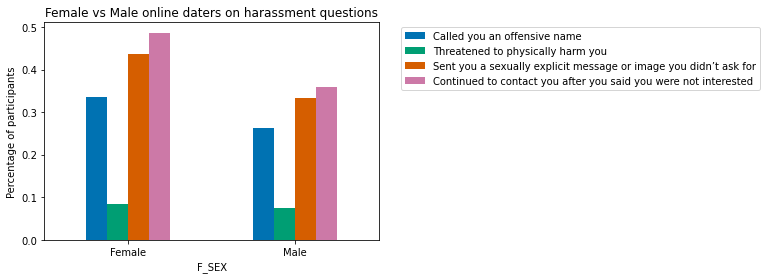

In [12]:
on_haras_dating = [ONHARASSa_W56,ONHARASSb_W56, ONHARASSc_W56, ONHARASSd_W56 ]
df.groupby('F_SEX').mean()[on_haras_dating].plot(kind='bar');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left');
plt.tick_params(axis='both', colors='black')
plt.xticks(rotation=0)
plt.ylabel('Percentage of participants')
plt.title('Female vs Male online daters on harassment questions');

In [13]:
df_w_harass = df[(df['F_SEX'] == 'Female') & (df['ONLINEDATE_W56'] == 'Yes, have done this') ][on_haras_dating]
df_w_harass['totl'] = df_w_harass[ONHARASSa_W56] + df_w_harass[ONHARASSb_W56] + df_w_harass[ONHARASSc_W56] + df_w_harass[ONHARASSd_W56]
df_m_harass = df[(df['F_SEX'] == 'Male') & (df['ONLINEDATE_W56'] == 'Yes, have done this') ][on_haras_dating]
df_m_harass['totl'] = df_m_harass[ONHARASSa_W56] + df_m_harass[ONHARASSb_W56] + df_m_harass[ONHARASSc_W56] + df_m_harass[ONHARASSd_W56]

In [14]:
# Total w=women, m=men responded yes to harassment questions
w_harass = sum([1 for each in df_w_harass['totl'] if each>0 ])
m_harass =sum ([1 for each in df_m_harass['totl'] if each>0 ])

# Total w=women, m=men online daters
w_totl_date = df[(df['ONLINEDATE_W56'] == 'Yes, have done this') & 
                 (df['F_SEX'] == 'Female')].shape[0]

m_totl_date = df[(df['ONLINEDATE_W56'] == 'Yes, have done this') & 
                 (df['F_SEX'] == 'Male')].shape[0]

print(f'Women online daters who have experienced harassment {round((w_harass/w_totl_date)*100,1)}%')
print(f'Men online daters who have experienced harassment {round((m_harass/m_totl_date)*100,1)}%')

Women online daters who have experienced harassment 62.7%
Men online daters who have experienced harassment 52.4%


The number of  online daters who reported to have experienced some type of harassment was 17% higher than non online daters. When looking at the difference between men and women, 62.7% women online daters said they have experienced harassment in their dates while 52.4% men reported the same. 

